# Regressão Linear com PyTorch

## Objetivo

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se 
- o cálculo do gradiente automático do PyTorch, porém 
- a função de perda e 
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma camada nn.Linear()

<img src='../figures/RegressaoLinear_Otimizacao.png',width=500></a>

## Importação dos pacotes

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
from torch.autograd import Variable

torch.manual_seed(1234)

## Leitura dos dados

In [10]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[ 7.       ]
 [ 6.4000001]
 [ 6.9000001]
 [ 5.5      ]
 [ 6.5      ]]
y_train[:5]:
 [[ 4.69999981]
 [ 4.5       ]
 [ 4.9000001 ]
 [ 4.        ]
 [ 4.5999999 ]]


### Normalização dos dados

In [11]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [12]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [13]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)

## Model

<img src='../figures/RegressaoLinearNeuronio.png', width=400></a>

In [14]:
model = torch.nn.Linear(2, 1, bias=False)

### Verificando a inicialização dos parâmetros

In [15]:
#model.weight.data = torch.zeros(1,2)
#torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight.data


-0.6661 -0.1387
[torch.FloatTensor of size 1x2]

### Testando o predict da rede

In [16]:
model(Variable(torch.ones((5,2))))

Variable containing:
-0.8049
-0.8049
-0.8049
-0.8049
-0.8049
[torch.FloatTensor of size 5x1]

## Treinamento

In [17]:
num_epochs = 10
learning_rate = 0.5
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    out = model(inputs)

    #loss cálculo da função de perda
    loss = torch.pow(out - target, 2).mean()
    print('loss:',loss.data.numpy())
    
    # backward propagation - cálculo gradiente
    loss.backward()
    
    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data
    
    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))

loss: [ 1.84255719]
loss: [ 0.14372961]
loss: [ 0.03255227]
loss: [ 0.02498699]
loss: [ 0.02421023]
loss: [ 0.02390243]
loss: [ 0.02364892]
loss: [ 0.02342045]
loss: [ 0.02321312]
loss: [ 0.0230249]


## Avaliação

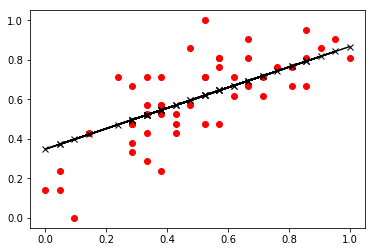

In [18]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Acessando os parâmetros

In [20]:
w_dic = model.state_dict()
w_dic

OrderedDict([('weight', 
               0.3482  0.5186
              [torch.FloatTensor of size 1x2])])

#### Varrendo o dicionário de parâmetros de forma explícita

In [11]:
for p,w in model.state_dict().items():
    print(p, w.numpy())

weight [[ 0.34410238  0.52662081]]


# Exercícios

1. Por que no final da varredura do laço de treinamento, a perda é impressa utilizando
   `loss.data[0]`? Por que precisa do `data` e por que precisa da indexação por zero?
   
2. Calcule e imprima o valor da perda (MSE) fazendo o predict da rede com os pesos já
   treinados.
3. Crie uma lista w_list para guardar a evolução dos valores dos parâmetros durante o
   laço de treinamento.
   Plote o gráfico tipo **scatter plot** para visualizar a variação dos parâmetros em 
   duas dimensões. Marque neste gráfico o valor ótimo do parâmetro dado pela solução
   analítica.

# Aprendizados